In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd /root

/root


In [ ]:
!cp "/gdrive/My Drive/Colab Notebooks/rockpaperscissors2.zip" "/tmp/"

In [ ]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors2.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors2'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
os.listdir('/tmp/rockpaperscissors2/train')


['paper', 'scissors', 'rock']

In [ ]:
os.listdir('/tmp/rockpaperscissors2/val')


['paper', 'scissors', 'rock']

In [ ]:
train_paper_dir = os.path.join(train_dir, 'paper')

train_rock_dir = os.path.join(train_dir, 'rock')

train_sci_dir = os.path.join(train_dir, 'scissors')


validation_paper_dir = os.path.join(validation_dir, 'paper')

validation_rock_dir = os.path.join(validation_dir, 'rock')

validation_sci_dir = os.path.join(validation_dir, 'scissors')

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical')

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
model.fit(
          train_generator,
          steps_per_epoch=30,  # berapa batch yang akan dieksekusi pada setiap epoch
          epochs=35,
          validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
          validation_steps=10,  # berapa batch yang akan dieksekusi pada setiap epoch
          verbose=2)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20, mode='min')

Epoch 1/35
30/30 - 8s - loss: 1.1786 - accuracy: 0.3917 - val_loss: 1.1071 - val_accuracy: 0.3750
Epoch 2/35
30/30 - 7s - loss: 1.1029 - accuracy: 0.3250 - val_loss: 1.0694 - val_accuracy: 0.5000
Epoch 3/35
30/30 - 7s - loss: 1.0789 - accuracy: 0.4333 - val_loss: 0.9591 - val_accuracy: 0.5000
Epoch 4/35
30/30 - 7s - loss: 0.9011 - accuracy: 0.5250 - val_loss: 0.6903 - val_accuracy: 0.7000
Epoch 5/35
30/30 - 7s - loss: 0.4532 - accuracy: 0.8250 - val_loss: 0.4722 - val_accuracy: 0.8500
Epoch 6/35
30/30 - 7s - loss: 0.5200 - accuracy: 0.8250 - val_loss: 0.4466 - val_accuracy: 0.8500
Epoch 7/35
30/30 - 7s - loss: 0.3337 - accuracy: 0.8974 - val_loss: 0.3106 - val_accuracy: 0.9000
Epoch 8/35
30/30 - 7s - loss: 0.2773 - accuracy: 0.9060 - val_loss: 0.2037 - val_accuracy: 0.9750
Epoch 9/35
30/30 - 7s - loss: 0.3661 - accuracy: 0.8376 - val_loss: 0.4341 - val_accuracy: 0.8000
Epoch 10/35
30/30 - 7s - loss: 0.2629 - accuracy: 0.8833 - val_loss: 0.4605 - val_accuracy: 0.8250
Epoch 11/35
30/30 -

Saving sciisoor.png to sciisoor (14).png
Komputer mengeluarkan paper
kamu mengeluarkan scissor
kamu Menang


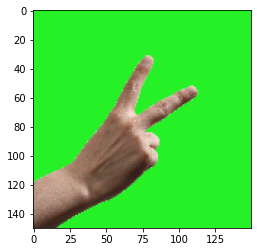

In [ ]:
import numpy as np
import random
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=25)
  prediksi = np.argmax(classes)
  
  tijah =['paper', 'rock', 'scissors']
  result = random.choice(tijah)
  print('Komputer mengeluarkan', result)

  # print(fn)
  if prediksi==0 and result=='paper:
    print('kamu mengeluarkan paper')
    print('kamu Seri')
  elif prediksi==0 and result=='rock':
    print('kamu mengeluarkan Paper')
    print('kamu Menang')
  elif prediksi==0 and result=='scissors':
    print('kamu mengeluarkan Paper')
    print('kamu Kalah')
  elif prediksi==1 and result=='paper':
    print('Kamu Mengeluarkan Rock')
    print('kamu Kalah')
  elif prediksi==1 and result=='rock':
    print('kamu mengeluarkan Rock')
    print('kamu Seri')
  elif prediksi==1 and result=='scissors':
    print('kamu mengeluarkan Rock')
    print('kamu Menang')
  elif prediksi==2 and result=='paper':
    print('kamu mengeluarkan scissor')
    print('kamu Menang')
  elif prediksi==2 and result=='rock':
    print('kamu mengeluarkan scissor')
    print('Kamu Kalah') 
  elif prediksi==2 and result=='scissors':
    print('kamu mengeluarkan scissor')
    print('kamu Seri')